In [61]:

##############################
# Diabete Feature Engineering
##############################

# Pregnancies: Hamilelik sayısı
# Glucose: Glikoz
# BloodPressure: Kan basıncı (Diastolic(Küçük Tansiyon))
# SkinThickness: Cilt Kalınlığı
# Insulin: İnsülin.
# BMI: Beden kitle indeksi.
# DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.
# Age: Yaş (yıl)
# Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)

In [6]:
#importing the necessary libraries
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV
import pickle
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.simplefilter(action="ignore")

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()
df.dtypes
df.isnull().sum()/df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,NaN
2,0.000,0.000,0.000,NaN,NaN,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
4,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
763,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
764,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,NaN
765,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
766,0.000,0.000,0.000,NaN,NaN,0.000,0.000,0.000,0.000


In [9]:
##################################
# GÖREV 1: KEŞİFCİ VERİ ANALİZİ
##################################

##################################
# GENEL RESİM
##################################

In [10]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [11]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                    

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [13]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


In [14]:
df.shape

(768, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,1.000,3.000,6.000,9.000,10.000,13.000,17.000
Glucose,768.000,120.895,31.973,0.000,79.000,99.000,117.000,140.250,167.000,181.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,38.700,62.000,72.000,80.000,88.000,90.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,0.000,23.000,32.000,40.000,44.000,51.330,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,0.000,30.500,127.250,210.000,293.000,519.900,846.000
BMI,768.000,31.993,7.884,0.000,21.800,27.300,32.000,36.600,41.500,44.395,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.140,0.244,0.372,0.626,0.879,1.133,1.698,2.420
Age,768.000,33.241,11.760,21.000,21.000,24.000,29.000,41.000,51.000,58.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000


In [17]:
# Target variable categorical
df.Outcome.unique()

array([1, 0], dtype=int64)

In [18]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Data Visualization

<Axes: >

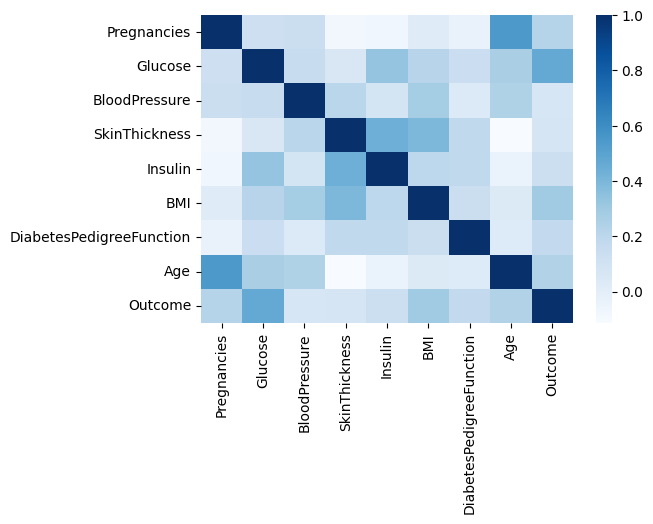

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

<Axes: >

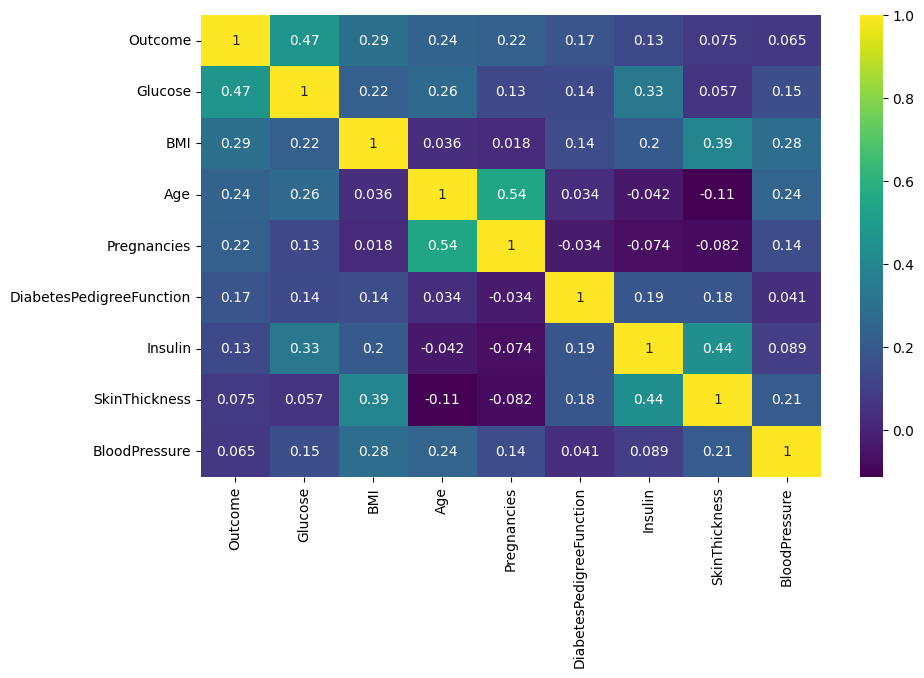

In [20]:
#Outcome correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

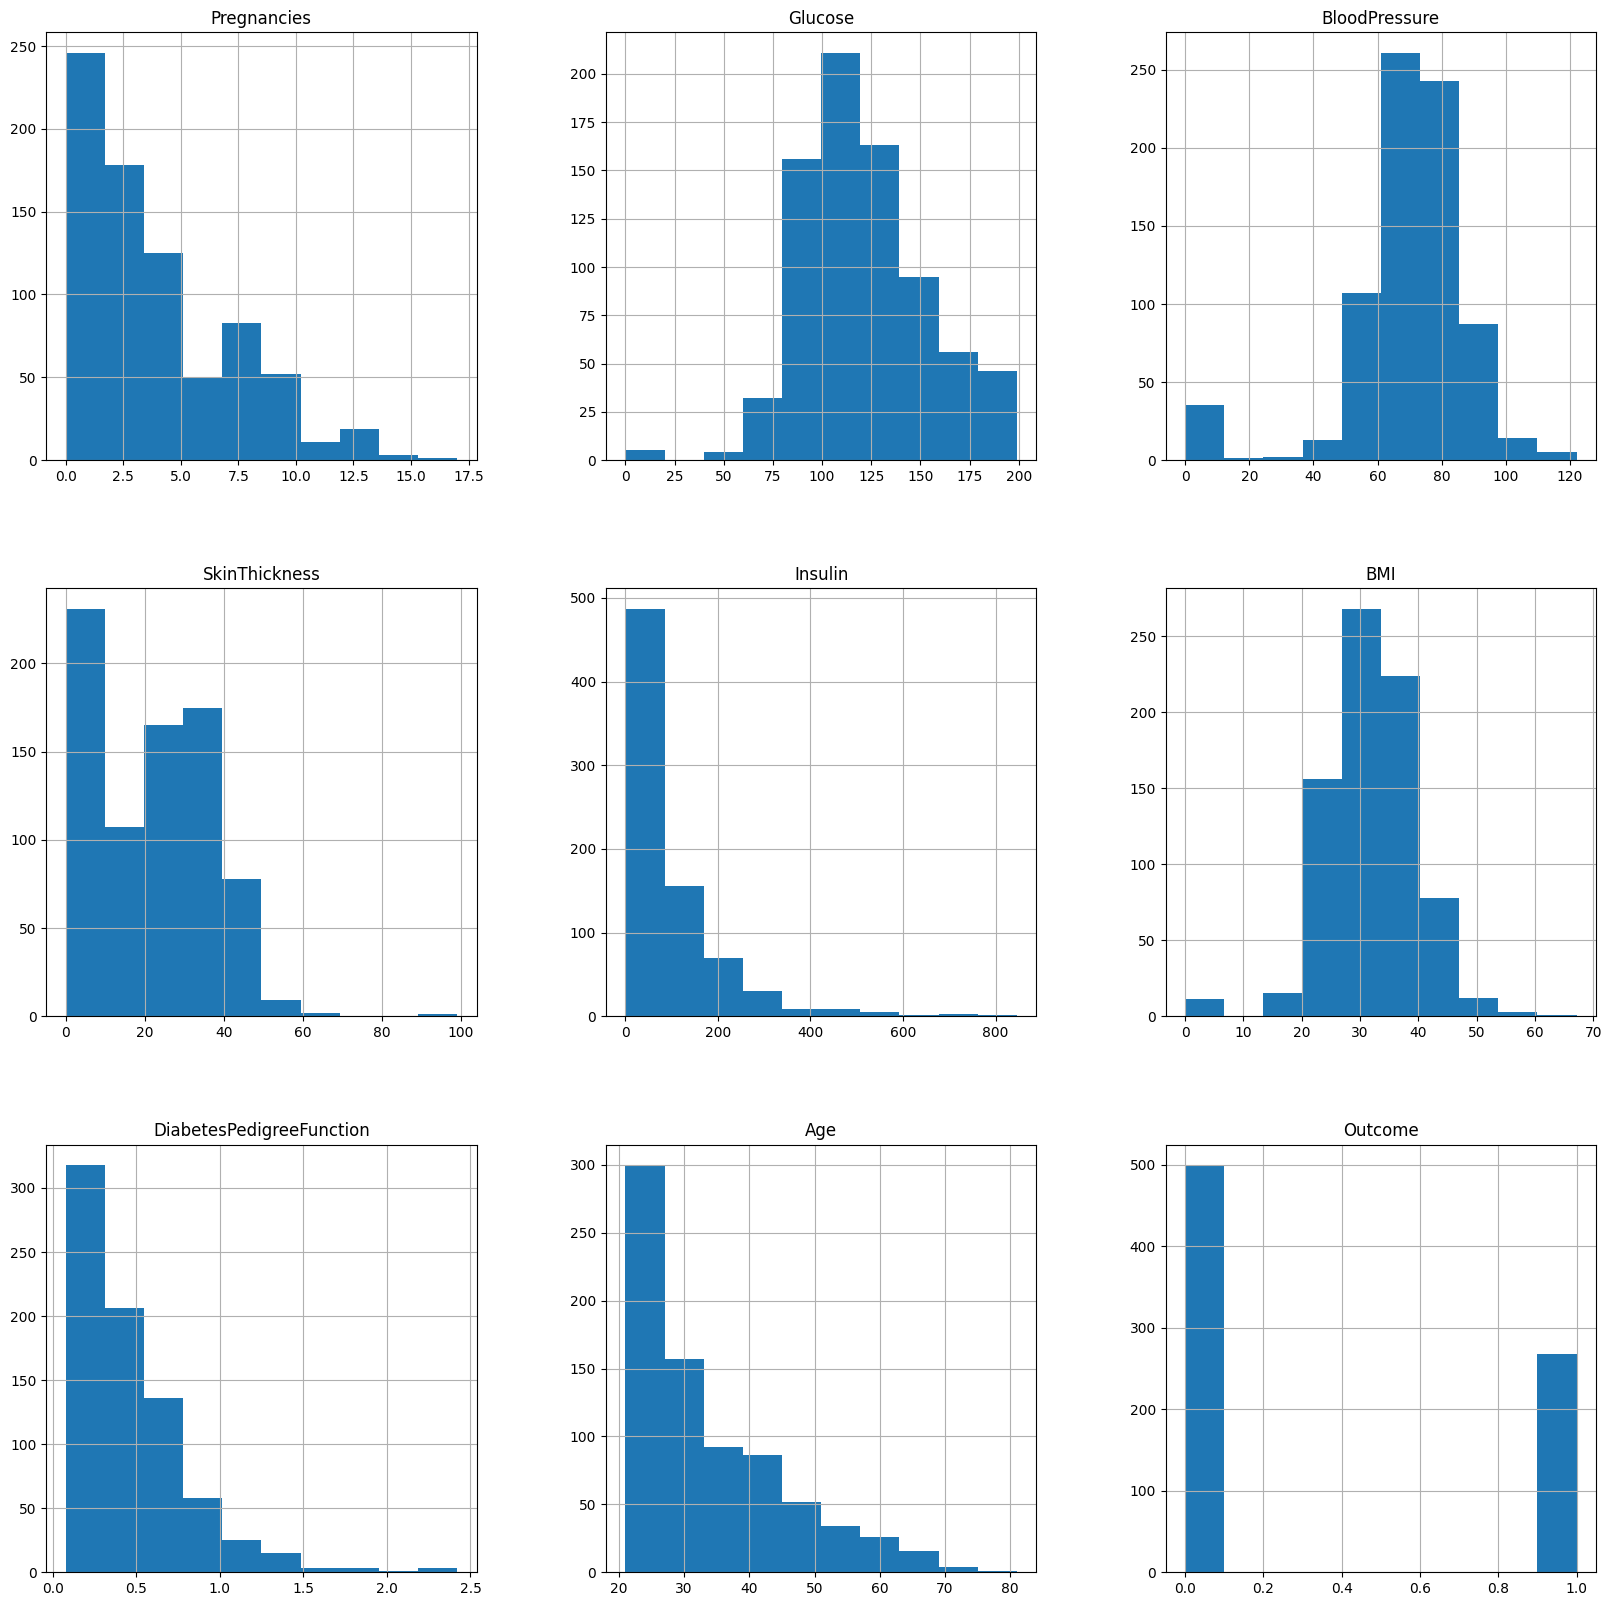

In [21]:
# see how the data is distributed.
df.hist(figsize = (20,20))

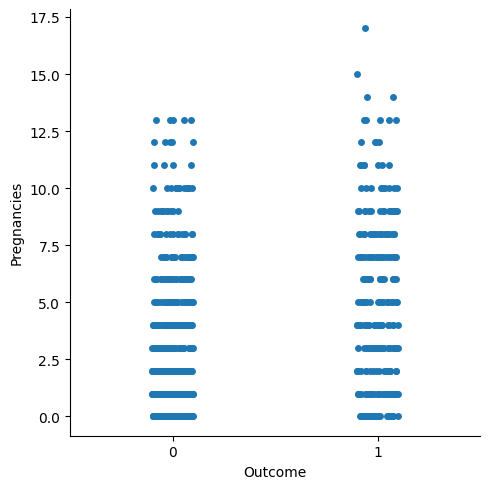

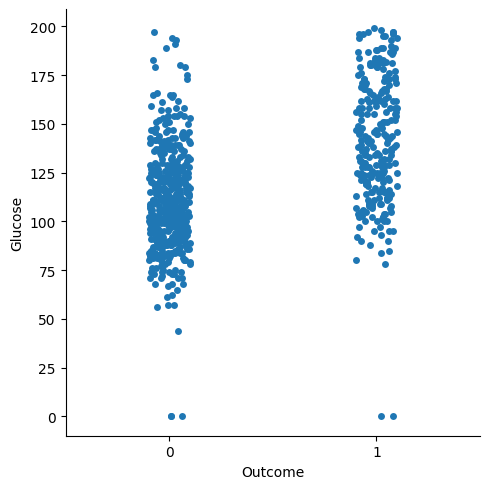

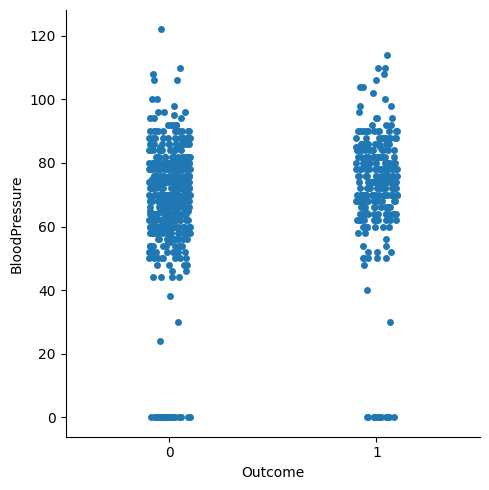

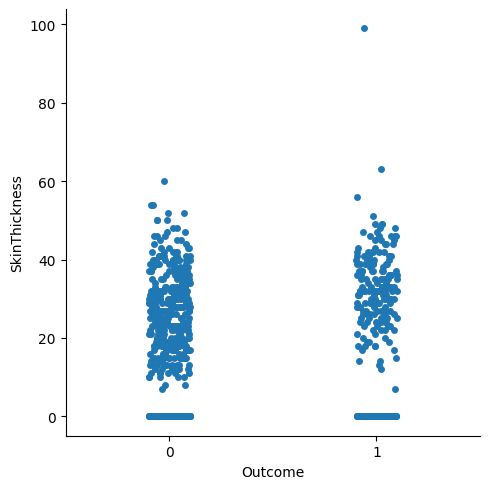

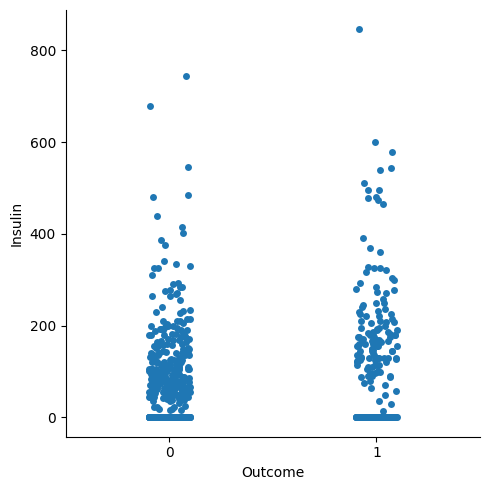

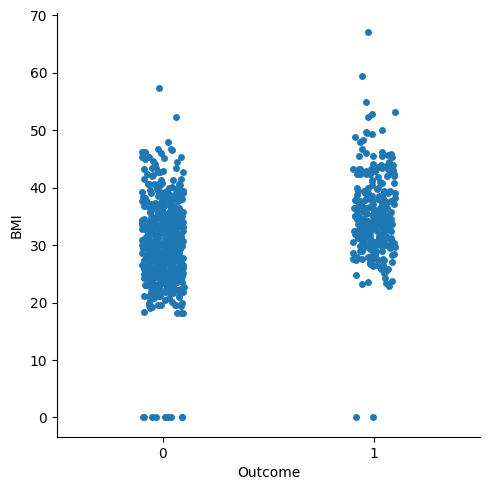

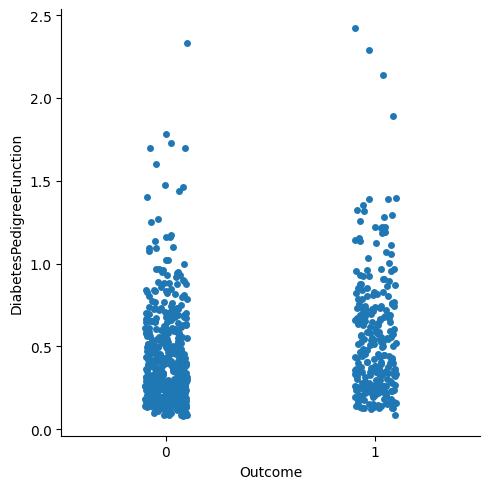

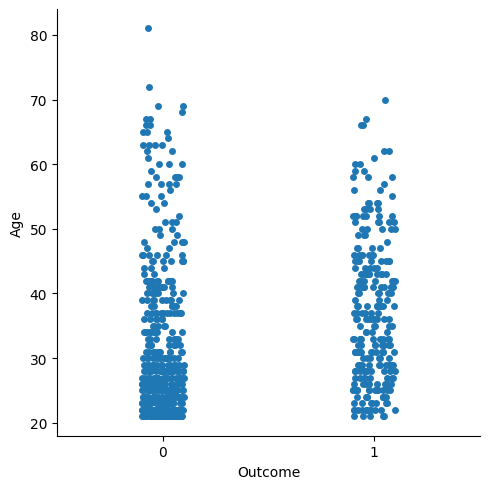

In [22]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(x="Outcome", y=col, data=df)
        plt.show()

In [23]:
####  DATA PREPROCESSING ####

In [24]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,1.000,3.000,6.000,9.000,10.000,13.000,17.000
Glucose,768.000,120.895,31.973,0.000,79.000,99.000,117.000,140.250,167.000,181.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,38.700,62.000,72.000,80.000,88.000,90.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,0.000,23.000,32.000,40.000,44.000,51.330,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,0.000,30.500,127.250,210.000,293.000,519.900,846.000
BMI,768.000,31.993,7.884,0.000,21.800,27.300,32.000,36.600,41.500,44.395,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.140,0.244,0.372,0.626,0.879,1.133,1.698,2.420
Age,768.000,33.241,11.760,21.000,21.000,24.000,29.000,41.000,51.000,58.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000


In [25]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [26]:
# Eksik değerler
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
# NaN değerleri medyanla doldurabiliriz
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [30]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [31]:
for col in df.columns:
    has_outliers(df, col)

SkinThickness yes
Insulin yes
DiabetesPedigreeFunction yes


In [32]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
replace_with_thresholds(df, df.columns)

In [34]:
for col in df.columns:
    has_outliers(df, col)

In [35]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,1.000,3.000,6.000,9.000,10.000,13.000,17.000
Glucose,768.000,121.677,30.464,44.000,80.000,99.750,117.000,140.250,167.000,181.000,196.000,199.000
BloodPressure,768.000,72.389,12.106,24.000,52.000,64.000,72.000,80.000,88.000,90.000,106.000,122.000
SkinThickness,768.000,29.056,8.671,7.000,14.350,25.000,28.000,32.000,40.000,44.000,51.330,73.000
Insulin,768.000,138.840,75.233,14.000,50.000,102.500,102.500,169.500,210.000,293.000,424.500,424.500
BMI,768.000,32.435,6.880,18.200,22.235,27.500,32.050,36.600,41.500,44.395,50.759,67.100
DiabetesPedigreeFunction,768.000,0.470,0.322,0.078,0.140,0.244,0.372,0.626,0.879,1.133,1.698,1.949
Age,768.000,33.241,11.760,21.000,21.000,24.000,29.000,41.000,51.000,58.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000


In [36]:
### FEATURE ENGINEERING ###

In [37]:
df['New_Glucose_Class'] = pd.cut(x=df['Glucose'], bins=[0,139,200],labels = ["Normal","Prediabetes"])

In [38]:
df['New_BMI_Range'] = pd.cut(x=df['BMI'], bins=[0,18.5,24.9,29.9,100],labels = ["Underweight","Healty","Overweight","Obese"])

In [39]:
df['New_BloodPressure'] = pd.cut(x=df['BloodPressure'], bins=[0,79,89,123],labels = ["Normal","HS1","HS2"])

In [40]:
df['New_SkinThickness'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6.000,148.000,72.000,35.000,169.500,33.600,0.627,50.000,1.000,Prediabetes,Obese,Normal,0
1,1.000,85.000,66.000,29.000,102.500,26.600,0.351,31.000,0.000,Normal,Overweight,Normal,0
2,8.000,183.000,64.000,32.000,169.500,23.300,0.672,32.000,1.000,Prediabetes,Healty,Normal,0
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,Normal,Overweight,Normal,0
4,0.000,137.000,40.000,35.000,168.000,43.100,1.949,33.000,1.000,Normal,Obese,Normal,0


In [42]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [43]:
categorical_columns = [col for col in df.columns
                           if len(df[col].unique()) <= 10
                      and col != "Outcome"]

In [44]:
categorical_columns

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [45]:
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)

In [46]:
new_cols_ohe

['New_Glucose_Class_Prediabetes',
 'New_BMI_Range_Healty',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healty,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6.000,148.000,72.000,35.000,169.500,33.600,0.627,50.000,1.000,True,False,False,True,False,False,False
1,1.000,85.000,66.000,29.000,102.500,26.600,0.351,31.000,0.000,False,False,True,False,False,False,False
2,8.000,183.000,64.000,32.000,169.500,23.300,0.672,32.000,1.000,True,True,False,False,False,False,False
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,False,False,True,False,False,False,False
4,0.000,137.000,40.000,35.000,168.000,43.100,1.949,33.000,1.000,False,False,False,True,False,False,False


In [48]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [49]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Outcome"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healty,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,0.600,0.765,0.000,1.000,1.000,0.170,0.159,1.235,1.000,True,False,False,True,False,False,False
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.013,0.118,0.000,False,False,True,False,False,False,False
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.187,0.176,1.000,True,True,False,False,False,False,False
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.128,-0.471,0.000,False,False,True,False,False,False,False
4,-0.600,0.494,-2.000,1.000,0.978,1.214,0.983,0.235,1.000,False,False,False,True,False,False,False


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pregnancies                    768 non-null    float64
 1   Glucose                        768 non-null    float64
 2   BloodPressure                  768 non-null    float64
 3   SkinThickness                  768 non-null    float64
 4   Insulin                        768 non-null    float64
 5   BMI                            768 non-null    float64
 6   DiabetesPedigreeFunction       768 non-null    float64
 7   Age                            768 non-null    float64
 8   Outcome                        768 non-null    float64
 9   New_Glucose_Class_Prediabetes  768 non-null    bool   
 10  New_BMI_Range_Healty           768 non-null    bool   
 11  New_BMI_Range_Overweight       768 non-null    bool   
 12  New_BMI_Range_Obese            768 non-null    boo

In [52]:
### Modeling ###

In [53]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [54]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782450 (0.054669)
KNN: 0.846275 (0.054445)
CART: 0.851572 (0.047099)
RF: 0.881528 (0.034549)
SVR: 0.852802 (0.050850)
XGBM: 0.886757 (0.037135)
GB: 0.882843 (0.035245)
[LightGBM] [Info] Number of positive: 230, number of negative: 461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332851 -> initscore=-0.695319
[LightGBM] [Info] Start training from score -0.695319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [55]:
### Model Tuning ###

In [56]:
# XGB
xgb_model = XGBClassifier()
# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}
xgb_cv_model  = GridSearchCV(xgb_model,
                             xgb_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2).fit(X,y)
xgb_cv_model.best_params_
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [57]:
# CatBoost
catboost_model = CatBoostClassifier()

# Model Tuning
catboost_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_data_in_leaf": np.linspace(1, 50, 10, dtype=int),
    "depth": [3, 5, 8],
    "subsample": [0.5, 0.9, 1.0],
    "iterations": [100, 1000]
}

catboost_cv_model = GridSearchCV(catboost_model,
                                 catboost_params,
                                 cv=10,
                                 n_jobs=-1,
                                 verbose=2).fit(X, y)


catboost_tuned = CatBoostClassifier(**catboost_cv_model.best_params_,
                                    verbose=10).fit(X, y)

train_accuracy = catboost_tuned.score(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
0:	learn: 0.6241195	total: 142ms	remaining: 2m 21s
1:	learn: 0.5662341	total: 161ms	remaining: 1m 20s
2:	learn: 0.5207818	total: 167ms	remaining: 55.4s
3:	learn: 0.4792087	total: 174ms	remaining: 43.4s
4:	learn: 0.4500288	total: 176ms	remaining: 35s
5:	learn: 0.4319882	total: 180ms	remaining: 29.9s
6:	learn: 0.4046019	total: 183ms	remaining: 26s
7:	learn: 0.3903861	total: 185ms	remaining: 23s
8:	learn: 0.3694189	total: 189ms	remaining: 20.9s
9:	learn: 0.3541384	total: 196ms	remaining: 19.4s
10:	learn: 0.3448898	total: 198ms	remaining: 17.8s
11:	learn: 0.3352056	total: 200ms	remaining: 16.5s
12:	learn: 0.3287209	total: 202ms	remaining: 15.3s
13:	learn: 0.3236990	total: 204ms	remaining: 14.4s
14:	learn: 0.3132533	total: 205ms	remaining: 13.5s
15:	learn: 0.3089269	total: 207ms	remaining: 12.7s
16:	learn: 0.3045285	total: 209ms	remaining: 12.1s
17:	learn: 0.3021317	total: 211ms	remaining: 11.5s
18:	learn: 0.2983018	total: 213

In [67]:
# LightGBM: 
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = lgbm_params = {"learning_rate": [0.01, 0.5, 1],
                             "n_estimators": [200, 500, 1000],
                             "max_depth": [6, 8, 10],
                             "colsample_bytree": [1, 0.5, 0.4 ,0.3 , 0.2]}
lgbm_cv_model = GridSearchCV(lgb_model,
                             lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X, y)
lgbm_cv_model.best_params_
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X, y)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [69]:
# evaluate each model in turn
models = [("XGB",xgb_tuned),
          ("CB" , catboost_tuned),
          ("LightGBM", lgbm_tuned),
          ]
results = []
names = []
for name, model in models:  
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.894583 (0.027358)
0:	learn: 0.6309211	total: 3.31ms	remaining: 3.3s
10:	learn: 0.3526627	total: 20.1ms	remaining: 1.81s
20:	learn: 0.2947378	total: 34.4ms	remaining: 1.6s
30:	learn: 0.2691199	total: 52.1ms	remaining: 1.63s
40:	learn: 0.2556375	total: 71.7ms	remaining: 1.68s
50:	learn: 0.2407607	total: 93.4ms	remaining: 1.74s
60:	learn: 0.2292326	total: 109ms	remaining: 1.68s
70:	learn: 0.2152249	total: 125ms	remaining: 1.64s
80:	learn: 0.1988545	total: 140ms	remaining: 1.59s
90:	learn: 0.1883144	total: 156ms	remaining: 1.56s
100:	learn: 0.1779151	total: 172ms	remaining: 1.53s
110:	learn: 0.1694185	total: 187ms	remaining: 1.5s
120:	learn: 0.1609561	total: 202ms	remaining: 1.47s
130:	learn: 0.1533201	total: 217ms	remaining: 1.44s
140:	learn: 0.1447070	total: 235ms	remaining: 1.43s
150:	learn: 0.1378033	total: 252ms	remaining: 1.42s
160:	learn: 0.1321294	total: 269ms	remaining: 1.4s
170:	learn: 0.1249601	total: 283ms	remaining: 1.37s
180:	learn: 0.1190464	total: 298ms	remaining: 1.

### Conclusion: 
- Classification models used for diabetes data set; Logistic Regression, KNN, CART, RF, SVC, XGBM, GB, LightGBM. 
- Hyperparameter optimization was applied to the 3 models(XGB, CatBoost, LightGBM,) with the highest score.
- The best cross validation score belongs to LightGBM.
- CB: 0.889388 (0.023174)
- XGB: 0.894583 (0.027358)
- LightGBM: 0.895899 (0.035656)

In [64]:
with open('LGBM_model.pkl', 'wb') as file:
    pickle.dump(lgbm_tuned, file)

In [65]:
with open('XGB_model.pkl', 'wb') as file:
    pickle.dump(xgb_tuned, file)

In [66]:
with open('CatBoost_model.pkl', 'wb') as file:
    pickle.dump(catboost_tuned, file)